In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Charger le fichier CSV correspondant
filename = f'data.csv'
df = pd.read_csv(filename)
target = 'Claim'
df

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62283,36315,36,EPX,Travel Agency,0.00,HONG KONG,Online,17,NaN,28.0,2 way Comprehensive Plan,0
62284,2511,56,JZI,Airlines,9.10,AUSTRALIA,Online,9,F,26.0,Basic Plan,0
62285,16874,36,EPX,Travel Agency,0.00,ITALY,Online,216,NaN,20.0,2 way Comprehensive Plan,1
62286,14801,29,CWT,Travel Agency,11.88,AUSTRALIA,Online,37,NaN,19.8,Rental Vehicle Excess Insurance,1


## <span style="font-size:50px;">Exploration des données (EDA)</span>



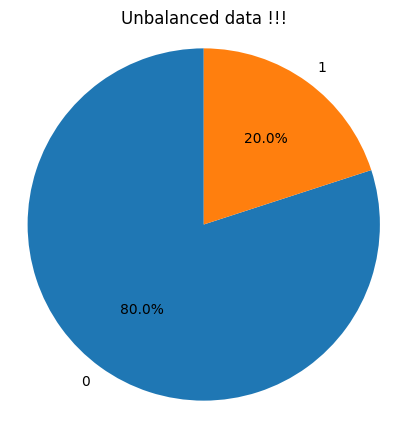

In [28]:
counts = df[target].value_counts()
plt.figure(figsize=(5, 5))  # Définition de la taille de la figure
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)  # Création du camembert
plt.axis('equal')  # L'axe des x et y est égal pour obtenir un camembert circulaire
plt.title("Unbalanced data !!!")  # Titre du diagramme
plt.show()  # Affichage du diagramme


## Preprocessing

# missing values

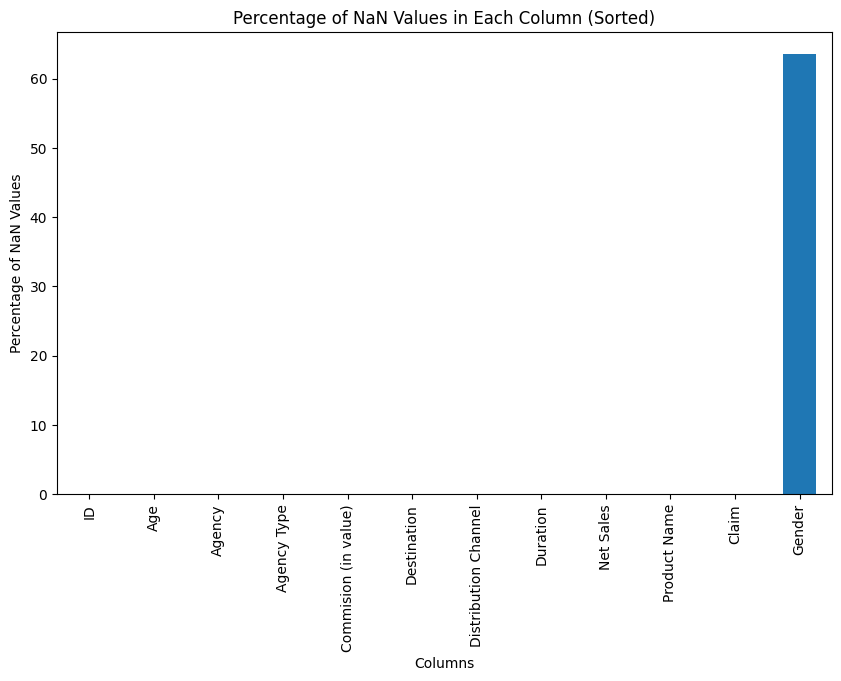

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'

# Calculate the percentage of NaN values in each column
nan_percentages = (df.isna().sum() / len(df)) * 100

# Sort the NaN percentages in ascending order
nan_percentages_sorted = nan_percentages.sort_values(ascending=True)

# Plot the NaN percentages in a bar graph
nan_percentages_sorted.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.title('Percentage of NaN Values in Each Column (Sorted)')
plt.xticks(rotation=90)
plt.show()



In [30]:
# Create two lists of columns based on the NaN percentages
columns_to_drop = nan_percentages[nan_percentages > 0].index.tolist()
columns_important = nan_percentages[nan_percentages <= 10].index.tolist()

In [31]:
df_dropped = df.drop(columns=columns_to_drop)
df_dropped

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,37.0,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,13.0,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,34.0,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,39.6,Rental Vehicle Excess Insurance,0
...,...,...,...,...,...,...,...,...,...,...,...
62283,36315,36,EPX,Travel Agency,0.00,HONG KONG,Online,17,28.0,2 way Comprehensive Plan,0
62284,2511,56,JZI,Airlines,9.10,AUSTRALIA,Online,9,26.0,Basic Plan,0
62285,16874,36,EPX,Travel Agency,0.00,ITALY,Online,216,20.0,2 way Comprehensive Plan,1
62286,14801,29,CWT,Travel Agency,11.88,AUSTRALIA,Online,37,19.8,Rental Vehicle Excess Insurance,1


# Tout est numerique ?

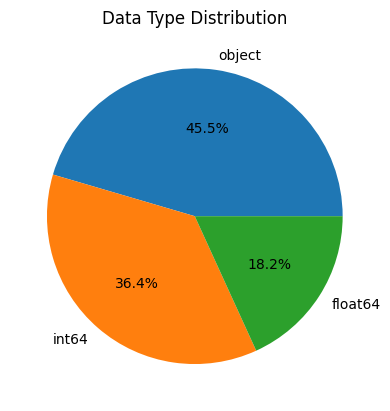

In [32]:
data_type_counts = df_dropped.dtypes.value_counts()
plt.pie(data_type_counts, labels=data_type_counts.index.map(str), autopct='%1.1f%%')
plt.title('Data Type Distribution')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called 'df'

# Create a copy of the original DataFrame
df_encoded = df_dropped.copy()
encoder = LabelEncoder()
# Iterate over each column in the DataFrame
for column in df_dropped.columns:
    # Check the data type of the column
    if df_dropped[column].dtype == object:
        # If the column contains string or text data, use LabelEncoder
        df_encoded[column] = encoder.fit_transform(df_dropped[column].astype(str)) 
    elif df_dropped[column].dtype == int:
        # If the column contains int data, encode the values directly
        df_encoded[column] = df_dropped[column] 

# Print the preprocessed DataFrame
df_encoded


,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Net Sales,Product Name,Claim
0,45341,28,2,0,28.13,79,1,34,112.5,17,1
1,12958,37,9,0,12.95,72,1,53,37.0,8,0
2,18233,27,7,1,0.00,96,1,28,13.0,10,0
3,31742,36,7,1,0.00,78,1,1,34.0,10,0
4,14381,26,6,1,23.76,88,1,33,39.6,16,0
...,...,...,...,...,...,...,...,...,...,...,...
62283,36315,36,7,1,0.00,34,1,17,28.0,1,0
62284,2511,56,9,0,9.10,1,1,9,26.0,8,0
62285,16874,36,7,1,0.00,42,1,216,20.0,1,1
62286,14801,29,6,1,11.88,1,1,37,19.8,16,1


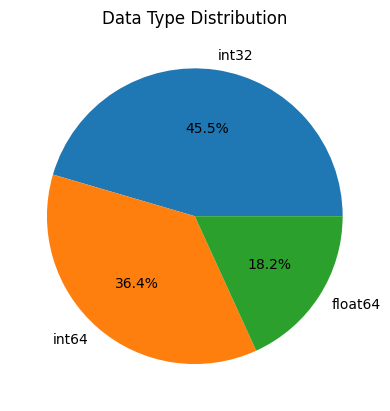

In [34]:
data_type_counts = df_encoded.dtypes.value_counts()
plt.pie(data_type_counts, labels=data_type_counts.index.map(str), autopct='%1.1f%%')
plt.title('Data Type Distribution')
plt.show()

## Important features

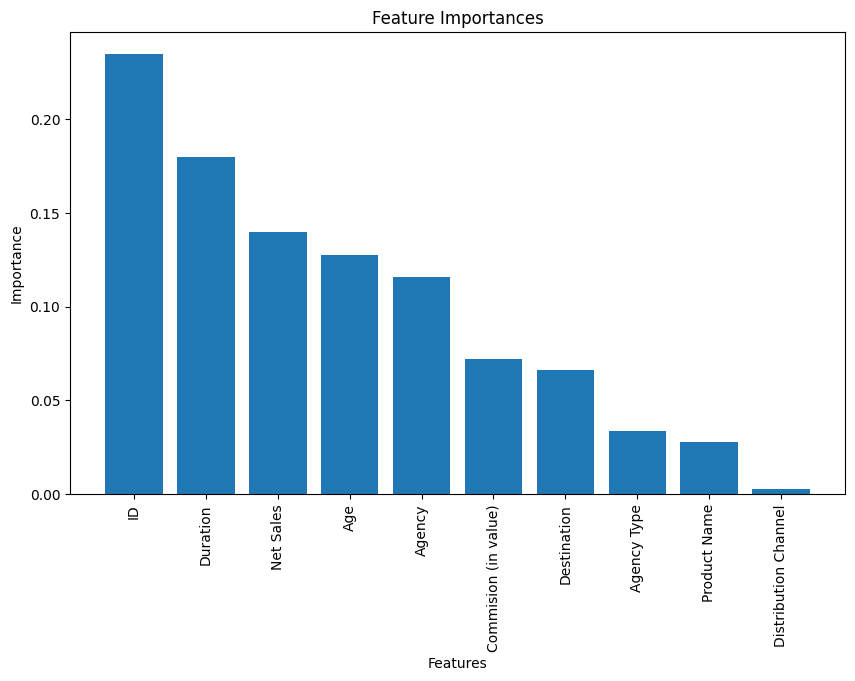

In [35]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming your preprocessed DataFrame is called 'df_encoded'
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the data
rf_classifier.fit(X, y)

# Get the feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values("Importance", ascending=False)
# Plot the feature importances in ascending order
plt.figure(figsize=(10, 6))
plt.bar(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()

In [36]:
threshold = 0.005

# Get the indices of features whose importance is above the threshold
selected_features_indices = np.where(feature_importances > threshold)[0]

# Get the names of the selected features, including the target column
selected_features = list(X.columns[selected_features_indices]) + [target]

# Create a new DataFrame with only the selected features
df_clean = df_encoded[selected_features]

# Print the DataFrame
df_clean


,ID,Age,Agency,Agency Type,Commision (in value),Destination,Duration,Net Sales,Product Name,Claim
0,45341,28,2,0,28.13,79,34,112.5,17,1
1,12958,37,9,0,12.95,72,53,37.0,8,0
2,18233,27,7,1,0.00,96,28,13.0,10,0
3,31742,36,7,1,0.00,78,1,34.0,10,0
4,14381,26,6,1,23.76,88,33,39.6,16,0
...,...,...,...,...,...,...,...,...,...,...
62283,36315,36,7,1,0.00,34,17,28.0,1,0
62284,2511,56,9,0,9.10,1,9,26.0,8,0
62285,16874,36,7,1,0.00,42,216,20.0,1,1
62286,14801,29,6,1,11.88,1,37,19.8,16,1


## Splitting the Data

In [37]:
X = df_clean.drop(target, axis=1)
X

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Duration,Net Sales,Product Name
0,45341,28,2,0,28.13,79,34,112.5,17
1,12958,37,9,0,12.95,72,53,37.0,8
2,18233,27,7,1,0.00,96,28,13.0,10
3,31742,36,7,1,0.00,78,1,34.0,10
4,14381,26,6,1,23.76,88,33,39.6,16
...,...,...,...,...,...,...,...,...,...
62283,36315,36,7,1,0.00,34,17,28.0,1
62284,2511,56,9,0,9.10,1,9,26.0,8
62285,16874,36,7,1,0.00,42,216,20.0,1
62286,14801,29,6,1,11.88,1,37,19.8,16


In [16]:
y = df_clean[target]

In [17]:
from sklearn.model_selection import train_test_split

# Split the data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Further split the test data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

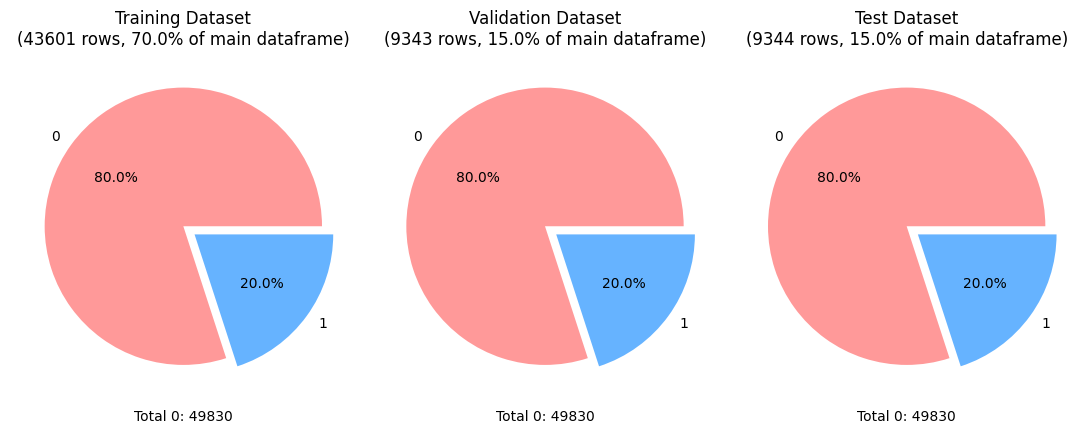

In [38]:
import matplotlib.pyplot as plt

# Calculate the percentage of rows with 1 and 0 in the target variable for each dataset
train_percentages = y_train.value_counts(normalize=True) * 100
val_percentages = y_val.value_counts(normalize=True) * 100
test_percentages = y_test.value_counts(normalize=True) * 100

# Calculate the total number of rows in the main dataframe
total_rows = len(df_clean)

# Calculate the number of rows for each class in the main dataframe
total_0 = (df_clean[target] == 0).sum()
total_1 = (df_clean[target] == 1).sum()

# Plot the pie charts
labels = ['0', '1']
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1)

plt.figure(figsize=(11, 11))

# Pie chart for the training dataset
plt.subplot(1, 3, 1)
plt.pie(train_percentages, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Training Dataset\n({} rows, {:.1f}% of main dataframe)'.format(len(X_train), len(X_train) / total_rows * 100))
plt.xlabel('Total 0: {}'.format(total_0))

# Pie chart for the validation dataset
plt.subplot(1, 3, 2)
plt.pie(val_percentages, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Validation Dataset\n({} rows, {:.1f}% of main dataframe)'.format(len(X_val), len(X_val) / total_rows * 100))
plt.xlabel('Total 0: {}'.format(total_0))

# Pie chart for the test dataset
plt.subplot(1, 3, 3)
plt.pie(test_percentages, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Test Dataset\n({} rows, {:.1f}% of main dataframe)'.format(len(X_test), len(X_test) / total_rows * 100))
plt.xlabel('Total 0: {}'.format(total_0))

plt.tight_layout()
plt.show()


## Training the model ( Random Forest)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Perform cross-validation
scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Calculate evaluation metrics
accuracy = scores.mean()
precision = precision_score(y_train, rf_classifier.predict(X_train))
recall = recall_score(y_train, rf_classifier.predict(X_train))
f1 = f1_score(y_train, rf_classifier.predict(X_train))

# Print the evaluation metrics
print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



Random Forest Classifier Evaluation:
Accuracy: 0.9924083988979465
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [20]:
import pickle
# Save the trained model to a file
filename = 'RandomForest.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

In [21]:
# Predict the target variable for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the number of instances for class 1 and class 0 in the test data
count_1_test = sum(y_test == 1)
count_0_test = sum(y_test == 0)

# Calculate the number of correctly predicted instances for class 1 and class 0
correct_1 = sum((y_pred == 1) & (y_test == 1))
correct_0 = sum((y_pred == 0) & (y_test == 0))

# Calculate the percentage of correctly predicted instances for class 1 and class 0
percentage_1 = (correct_1 / count_1_test) * 100
percentage_0 = (correct_0 / count_0_test) * 100

# Print the results
print("Percentage of correctly predicted instances for class 1:", percentage_1)
print("Percentage of correctly predicted instances for class 0:", percentage_0)


Percentage of correctly predicted instances for class 1: 100.0
Percentage of correctly predicted instances for class 0: 99.19732441471571


## Results

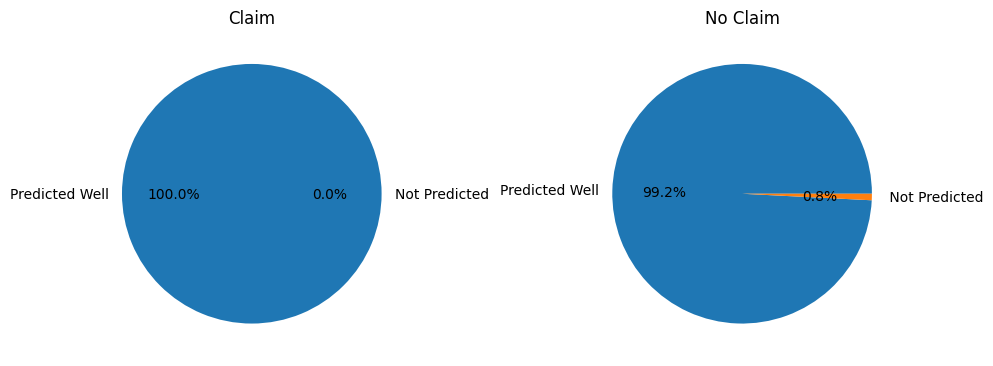

In [24]:
import matplotlib.pyplot as plt

# Calculate the percentages of correctly predicted instances
percentage_1 = (correct_1 / count_1_test) * 100
percentage_0 = (correct_0 / count_0_test) * 100

# Calculate the percentages of incorrectly predicted instances
percentage_incorrect_1 = 100 - percentage_1
percentage_incorrect_0 = 100 - percentage_0

# Create a list of percentages
percentages = [percentage_1, percentage_incorrect_1, percentage_0, percentage_incorrect_0]

# Create a list of class labels
class_labels = ['Predicted Well', 'Not Predicted', 'Predicted Well', ' Not Predicted']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create the first pie chart for class 1
ax1.pie([percentage_1, percentage_incorrect_1], labels=[class_labels[0], class_labels[1]], autopct='%1.1f%%')
ax1.set_title('Claim')

# Create the second pie chart for class 0
ax2.pie([percentage_0, percentage_incorrect_0], labels=[class_labels[2], class_labels[3]], autopct='%1.1f%%')
ax2.set_title('No Claim')

# Adjust the layout and spacing
plt.tight_layout()

# Display the pie charts
plt.show()


In [25]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[7415   60]
 [   0 1869]]
